In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
DATA_DIR = "../data/bse/equity"
START_DATE = "2025-01-01"
END_DATE = "2025-07-05"

In [3]:
columns_to_keep = ['TradDt', 'TckrSymb', 'OpnPric', 'HghPric', 'LwPric', 'ClsPric', 'TtlTradgVol', 'TtlTrfVal', 'TtlNbOfTxsExctd']

In [4]:
STOCK_SYMBOLS = ["RELIANCE", "ONGC", "IOC", "BPCL", "HPCL", "GAIL"]     # Must match symbol in bhavcopy

In [5]:
start_date = datetime.strptime(START_DATE, "%Y-%m-%d")
end_date = datetime.strptime(END_DATE, "%Y-%m-%d")

# Validation
assert (end_date - start_date).days >= 13, "Range must be at least 14 days."
assert (end_date - start_date).days <= 364, "Range must be less than 1 year."


In [6]:
symbol_data = {symbol: [] for symbol in STOCK_SYMBOLS}
current_date = start_date

while current_date <= end_date:
    file_date_str = current_date.strftime("%d%b%Y").upper()  # e.g., 01JAN2024
    year_folder = current_date.strftime("%Y")
    filename = f"{file_date_str}.csv.gz"
    file_path = os.path.join(DATA_DIR, year_folder, filename)
    
    if os.path.exists(file_path):
        try:
            # Read and select required columns
            df = pd.read_csv(file_path, compression='gzip')
            all_columns = set(df.columns)
            columns_to_drop = list(all_columns - set(columns_to_keep)) 
            df.drop(columns=columns_to_drop, inplace=True)
            
            # Filter the row
            for symbol in STOCK_SYMBOLS:
                filtered_row = df[df['TckrSymb'] == symbol].copy()
                if not filtered_row.empty:
                    filtered_row.loc[:, "DATE"] = current_date
                    symbol_data[symbol].append(filtered_row)
            
        except Exception as e:
            print(f"❌ Error reading {file_path}: {e}")
    
    current_date += timedelta(days=1)


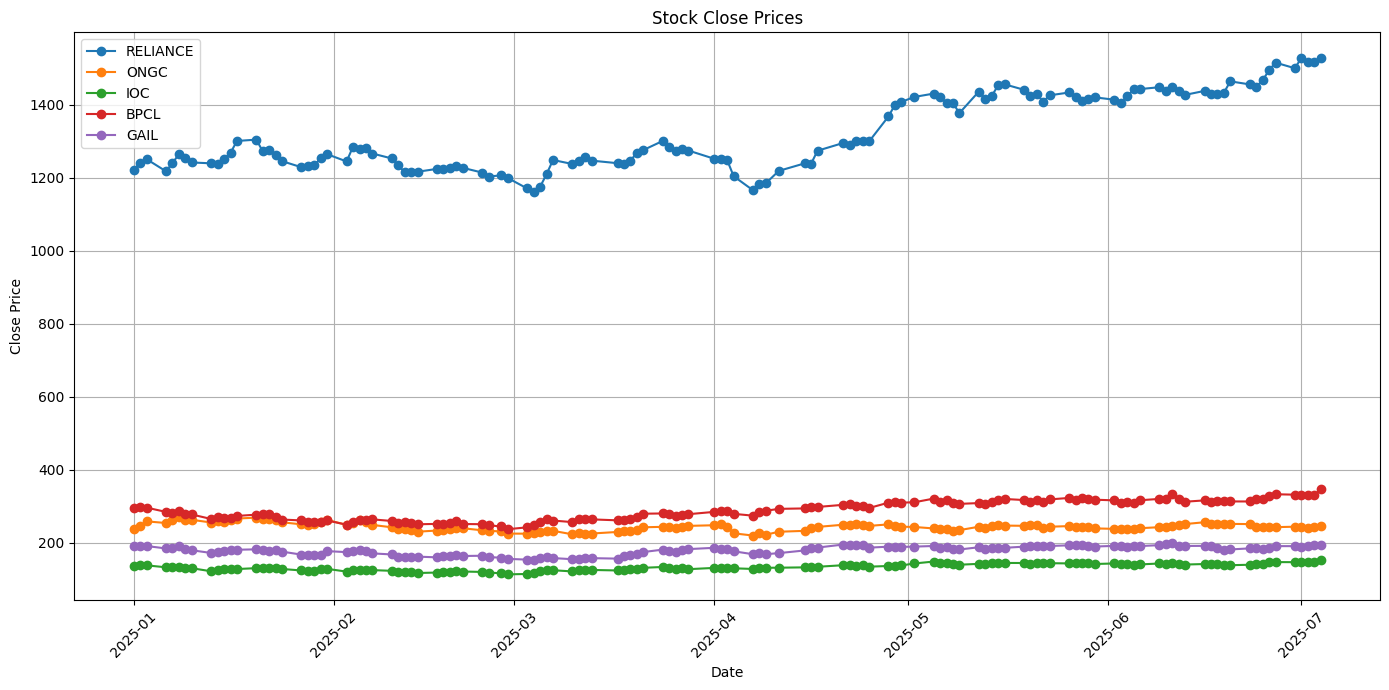

In [7]:
plt.figure(figsize=(14, 7))

for symbol, rows in symbol_data.items():
    if rows:
        df = pd.concat(rows)
        df.sort_values("DATE", inplace=True)
        plt.plot(df["DATE"], df["ClsPric"], marker='o', label=symbol)

plt.title("Stock Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df = pd.read_csv("../data/bse/equity/2025/01AUG2025.csv.gz",compression='gzip')

In [9]:
df.columns

Index(['TradDt', 'BizDt', 'Sgmt', 'Src', 'FinInstrmTp', 'FinInstrmId', 'ISIN',
       'TckrSymb', 'SctySrs', 'XpryDt', 'FininstrmActlXpryDt', 'StrkPric',
       'OptnTp', 'FinInstrmNm', 'OpnPric', 'HghPric', 'LwPric', 'ClsPric',
       'LastPric', 'PrvsClsgPric', 'UndrlygPric', 'SttlmPric', 'OpnIntrst',
       'ChngInOpnIntrst', 'TtlTradgVol', 'TtlTrfVal', 'TtlNbOfTxsExctd',
       'SsnId', 'NewBrdLotQty', 'Rmks', 'Rsvd1', 'Rsvd2', 'Rsvd3', 'Rsvd4'],
      dtype='object')

In [10]:
# Cols: 'TradDt', 'TckrSymb', 'OpnPric', 'HghPric', 'LwPric', 'ClsPric', 'TtlTradgVol', 'TtlTrfVal', 'TtlNbOfTxsExctd'

In [11]:
df['TckrSymb'].unique()

array(['SGBJUN28', 'SGBN28VIII', 'SGBMAY29I', ..., 'ZUARIIND',
       'ZYDUSLIFE', 'ZYDUSWELL'], shape=(3052,), dtype=object)